<center><h1><strong>Ridge Regression(L2 Regularization)</strong></h1></center>

<h3>Why Ridge Regression is needed.</h3>


- Features are highly correlated (multicollinearity).
- Model overfits(training high accuracy , test accuracy low).
- Coefficients become very large and unstable.

If lambda is small -> slope will increase<br/>
if lambda is large -> slope will decrease

<h3>When to use ridge regression</h3>

- Many features
- Features are correlated
- You want to reduce overfitting
- All features are important (not for feature selection)

In [14]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

Load the dataset

In [15]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Load target

In [17]:
df['target'] = data.target

In [18]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
x= df.drop('target',axis=1)
y = df['target']

Train test split our data

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Standardizing the data

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
ridge = Ridge(alpha=1.0) #alpha = lambda
model = ridge.fit(x_train,y_train)

y_pred = model.predict(x_test)

Get R2 Score of Ridge

In [23]:
score = r2_score(y_test,y_pred)
print(score)

0.5957885548359448


In [24]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

mdl = regression.fit(x_train,y_train)
y_pred_l = mdl.predict(x_test)

Get R2 score of Linear Regression

In [25]:
score_l = r2_score(y_test,y_pred_l)
print(score_l)

0.5957702326061665


Compare the coefficients

In [26]:
coeff_df = pd.DataFrame(
    {
        "Feature":x.columns,
        "Linear Regression":mdl.coef_,
        "Ridge Regression":model.coef_
    }
)
print(coeff_df)

      Feature  Linear Regression  Ridge Regression
0      MedInc           0.849222          0.849152
1    HouseAge           0.122119          0.122208
2    AveRooms          -0.299558         -0.299309
3   AveBedrms           0.348410          0.348103
4  Population          -0.000884         -0.000854
5    AveOccup          -0.041698         -0.041702
6    Latitude          -0.893856         -0.893003
7   Longitude          -0.868617         -0.867752


Visualize Effect of alpha

In [27]:
import matplotlib.pyplot as plt

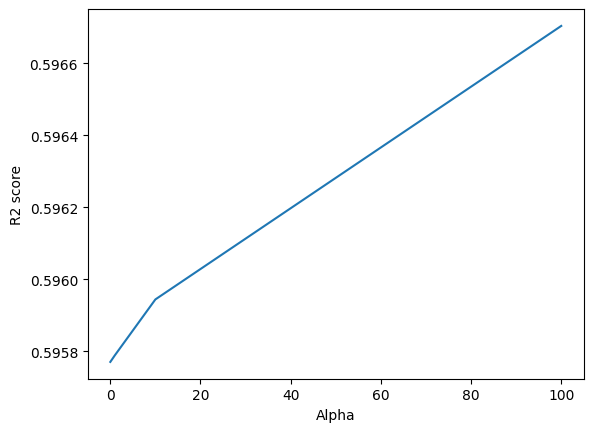

In [28]:
alphas = [0.01,0.1,1,10,100]

scores = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(x_train,y_train)
    scores.append(model.score(x_test,y_test))

plt.plot(alphas,scores)
plt.xlabel("Alpha")
plt.ylabel("R2 score")
plt.show()

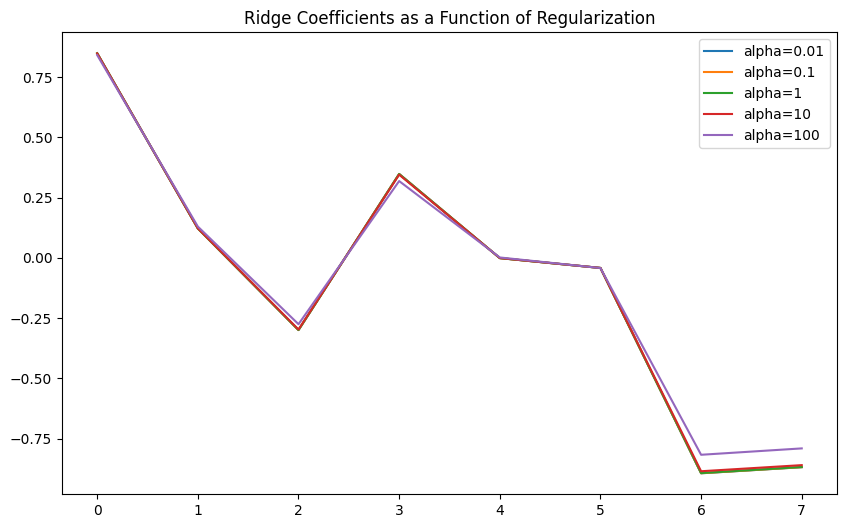

In [29]:
alphas = [0.01, 0.1, 1, 10, 100]
coef = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train,y_train)
    coef.append(ridge.coef_)

plt.figure(figsize=(10,6))
for i in range(len(coef)):
    plt.plot(coef[i],label=f'alpha={alphas[i]}')

plt.legend()
plt.title("Ridge Coefficients as a Function of Regularization")
plt.show()